In [2]:
import numpy as np
import json
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

In [3]:
# loading data from training data
f = open('./whats-cooking/train.json','r')
train_data = json.loads(f.read())
f.close()

In [57]:
# loading data from testing data
f = open('./whats-cooking/test.json','r')
test_data = json.loads(f.read())
f.close()

In [17]:
#(b) count
dish_count = len(train_data)
cuisine = []
uniq_ingredients = []

for d in train_data:
    cuisine.append(d['cuisine'])
    uniq_ingredients += d['ingredients']

uniq_ingredients = np.unique(uniq_ingredients)
cuisine = np.unique(cuisine)
cuisine_count = len(cuisine)
uniq_ingredients_count = len(uniq_ingredients)

print("dish count: {}".format(dish_count))
print("unique cuisines: {}".format(cuisine_count))
print("unique ingredients: {}".format(uniq_ingredients_count))

dish count: 39774
unique cuisines: 20
unique ingredients: 6714


In [38]:
#(c) Represent each dish by a binary ingredient feature vector. 
#https://stackoverflow.com/questions/45312377/how-to-one-hot-encode-from-a-pandas-column-containing-a-list
from sklearn.preprocessing import MultiLabelBinarizer
train_data_df = pd.DataFrame(train_data)
mlb = MultiLabelBinarizer()
binary_train_data_df = train_data_df.join(pd.DataFrame(mlb.fit_transform(train_data_df.pop('ingredients')),
                          columns=mlb.classes_,
                          index=train_data_df.index))
binary_train_data_df

,id,cuisine,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1% low-fat buttermilk,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
0,10259,greek,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20130,filipino,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22213,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13162,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,29109,irish,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39770,11462,italian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39771,2238,irish,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39772,41882,chinese,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# convert dataframe to nparray
train_labels = df['cuisine'].to_numpy()
binary_train_data_df.drop(['id','cuisine'], axis=1, inplace=True)
binary_train_data = binary_train_data_df.to_numpy()
binary_train_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [40]:
#print(binary_train_data.shape)

(39774, 6714)


In [46]:
#(d) Using Naïve Bayes Classifier to perform 3 fold cross-validation on the training set
# Report your average classification accuracy.
# Try both Gaussian distribution prior assumption and Bernoulli distribution prior assumption.
gaussian = GaussianNB() 
bernoulli = BernoulliNB()
Gaussian_accuracy = []
Bernoulli_accuracy = []
kf = KFold(n_splits=3)
for train_index, test_index in kf.split(binary_train_data):
    trainx = binary_train_data[train_index]
    testx = binary_train_data[test_index]
    trainy = train_labels[train_index]
    testy = train_labels[test_index] 
    gaussian.fit(trainx, trainy)
    score_gaussian = gaussian.score(testx, testy)
    Gaussian_accuracy.append(score_gaussian)
    avg_score_g = np.average(Gaussian_accuracy)
    bernoulli.fit(trainx, trainy)
    score_bernoulli = bernoulli.score(testx, testy)
    Bernoulli_accuracy.append(score_bernoulli)
    avg_score_b = np.average(Bernoulli_accuracy)
    print("Average accuracy of Gaussian:", avg_score_g)
    print("Average accuracy of Bernoulli:", avg_score_b)

Average accuracy of Gaussian: 0.37901644290239855
Average accuracy of Bernoulli: 0.684190677326897
Average accuracy of Gaussian: 0.3809775230049781
Average accuracy of Bernoulli: 0.6818524664353598
Average accuracy of Gaussian: 0.3798461306381053
Average accuracy of Bernoulli: 0.6835369839593705


(e) For Gaussian prior and Bernoulli prior which performs better in terms of cross-validation accuracy? Why? Please give specific arguments.

Average accuracy of Gaussian prior is aroung 0.38 and average accuracy of Bernoulli is around 0.68. Bernoulli performs better in terms of cross-validation accuracy. The ingredients have two features which are represented by 0 or 1 (i.e. existing or non-existing), which is better described by a Bernoulli model. Thus, Bernoulli distribution prior assumption is better. 

In [48]:
# (f) Using Logistic Regression Model to perform 3 fold cross-validation on the training set 
# Report your average classification accuracy

# import warnings filter
import warnings 
# ignore all future warnings
warnings.simplefilter('ignore')

logreg = LogisticRegression()
logreg_accuracy = []
for train_index, test_index in kf.split(binary_train_data):
    trainx = binary_train_data[train_index]
    testx = binary_train_data[test_index]
    trainy = train_labels[train_index]
    testy = train_labels[test_index] 
    logreg.fit(trainx, trainy)
    score_logreg = logreg.score(testx, testy)
    logreg_accuracy.append(score_logreg)
    avg_score_l = np.average(logreg_accuracy)
    print("Average accuracy of LogisticRegression:", avg_score_l)

Average accuracy of LogisticRegression: 0.7758334590435964
Average accuracy of LogisticRegression: 0.773985518177704
Average accuracy of LogisticRegression: 0.7755568964650275


In [67]:
# (g) Train your best-performed classifier with all of the training data, and generate test labels on
# test set. Submit your results to Kaggle and report the accuracy.

# Average accuracy of LogisticRegression is about 0.77, which is the best-performed classifier
# train LogisticRegression with all of the training data

# prepare test data
binary_test_data = np.zeros([len(test_data), uniq_ingredients_count])

for i, dish in enumerate(test_data):
    for j in dish['ingredients']:
        if j in uniq_ingredients:
            binary_test_data[i][np.where(uniq_ingredients == j)] = 1
    

In [74]:
#train model
logreg.fit(binary_train_data, train_labels)
pred = logreg.predict(binary_test_data)

In [75]:
#output
df = pd.DataFrame(data = {"id" : test_id, "cuisine" : pred})
df.to_csv(path_or_buf="result.csv", index=False)

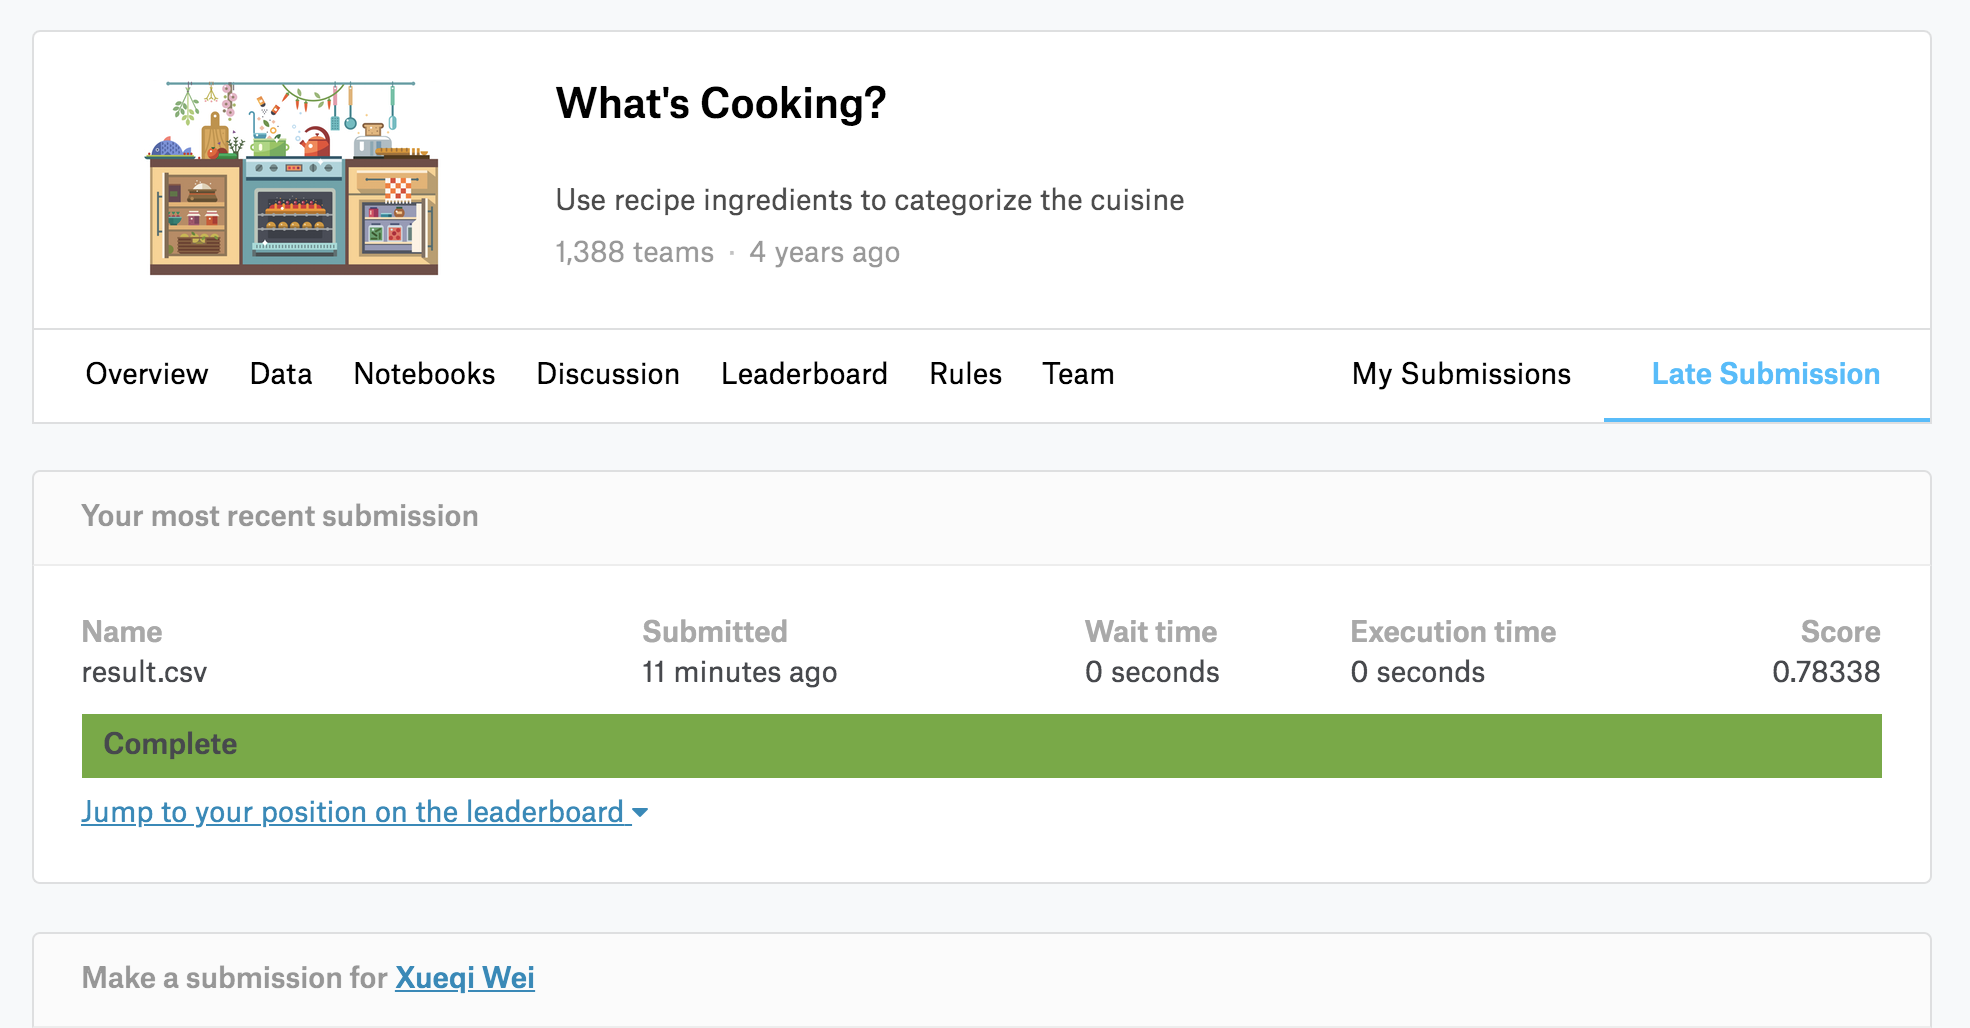

The accuracy on Kaggle after submission is 0.78338.